# Learning heatmaps
## Seaborn with heatmaps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
olympics = pd.read_csv('olympics.csv', skiprows=4)

__Using the Olympic dataset, present a summary of the total medals won by participating countries in the 2008 Olympics.__

In [3]:
olm_08 = olympics[olympics.Edition == 2008]

In [4]:
df = olm_08.groupby(['NOC','Medal']).size().unstack('Medal', fill_value=0).sort_values(['Gold','Silver','Bronze'], ascending=False)[['Gold','Silver','Bronze']]

In [5]:
df.head()

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26


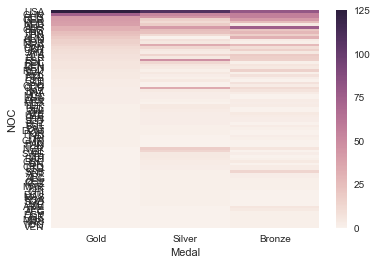

In [6]:
sns.heatmap(df)

In [7]:
df_trs = df.transpose()

In [8]:
df_trs

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


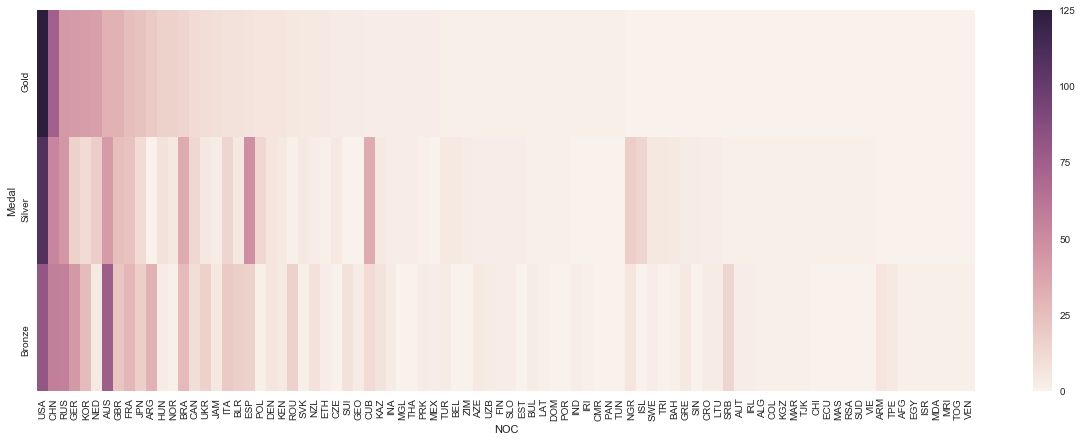

In [9]:
plt.figure(figsize=(21,7))
sns.heatmap(df_trs)

__Create Your Own Colormap__

In [10]:
top = olympics.groupby(['Athlete','Medal']).size()
top.unstack('Medal', fill_value=0).head()

Medal,Bronze,Gold,Silver
Athlete,,,
"AABYE, Edgar",0,1,0
"AALTONEN, Arvo Ossian",2,0,0
"AALTONEN, Paavo Johannes",2,3,0
"AAMODT, Ragnhild",0,1,0
"AANING, Alf Lied",0,0,1


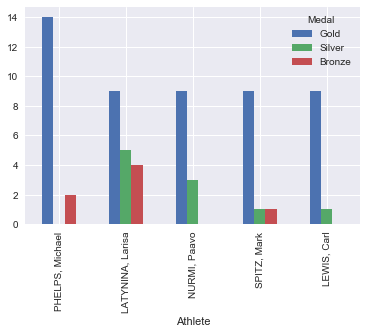

In [11]:
top.unstack('Medal', fill_value=0).sort_values(['Gold','Silver','Bronze'], ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar');

In [12]:
from matplotlib.colors import ListedColormap

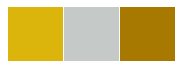

In [13]:
gsb = ['#dbb40c','#c5c9c7','#a87900']
sns.palplot(sns.color_palette(gsb))

In [14]:
my_gsb = ListedColormap(sns.color_palette(gsb))

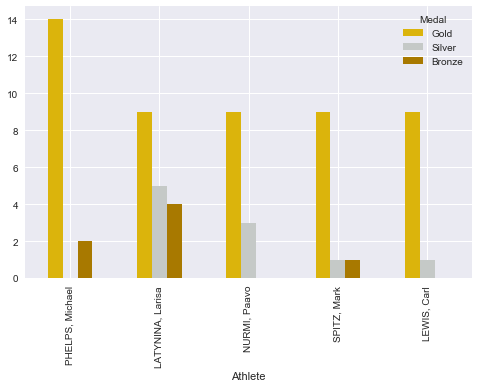

In [15]:
top.unstack('Medal', fill_value=0).sort_values(['Gold','Silver','Bronze'], ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar', colormap=my_gsb, figsize=(8,5));

# Final Challenge

__In every Olympics, which US athlete has won the most total number of medals? Include the athlete's discipline.__

In [16]:
olympics.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [17]:
us = olympics[olympics.NOC == 'USA']
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4335 entries, 11 to 29209
Data columns (total 10 columns):
City            4335 non-null object
Edition         4335 non-null int64
Sport           4335 non-null object
Discipline      4335 non-null object
Athlete         4335 non-null object
NOC             4335 non-null object
Gender          4335 non-null object
Event           4335 non-null object
Event_gender    4335 non-null object
Medal           4335 non-null object
dtypes: int64(1), object(9)
memory usage: 372.5+ KB


In [18]:
us_group = us.groupby(['Edition','Athlete','Medal','Discipline']).size().unstack('Medal', fill_value=0).sort_index()

In [19]:
us_group['Total'] = us_group.Gold + us_group.Silver + us_group.Bronze
us_group.head()

Medal                               Bronze  Gold  Silver  Total
Edition Athlete         Discipline                             
1896    BLAKE, Arthur   Athletics        0     0       1      1
        BURKE, Thomas   Athletics        0     2       0      2
        CLARK, Ellery   Athletics        0     2       0      2
        CONNOLLY, James Athletics        1     1       1      3
        CURTIS, Thomas  Athletics        0     1       0      1

In [20]:
us_group.reset_index(inplace=True)
t = [group.sort_values('Total', ascending=False)[:1] for year, group in us_group.groupby('Edition')]
t

[Medal  Edition          Athlete Discipline  Bronze  Gold  Silver  Total
 5         1896  GARRETT, Robert  Athletics       0     2       2      4,
 Medal  Edition         Athlete Discipline  Bronze  Gold  Silver  Total
 14        1900  BAXTER, Irving  Athletics       0     2       3      5,
 Medal  Edition        Athlete   Discipline  Bronze  Gold  Silver  Total
 117       1904  EYSER, George  Artistic G.       1     3       2      6,
 Medal  Edition           Athlete Discipline  Bronze  Gold  Silver  Total
 370       1908  SHERIDAN, Martin  Athletics       1     2       0      3,
 Medal  Edition                Athlete Discipline  Bronze  Gold  Silver  Total
 428       1912  OSBURN, Carl Townsend   Shooting       1     1       2      4,
 Medal  Edition                 Athlete Discipline  Bronze  Gold  Silver  Total
 567       1920  SPOONER, Lloyd Spencer   Shooting       2     4       1      7,
 Medal  Edition            Athlete Discipline  Bronze  Gold  Silver  Total
 705       1924  

In [21]:
top = pd.DataFrame()

In [25]:
for i in t:
    top = top.append(i)
top

Medal,Edition,Athlete,Discipline,Bronze,Gold,Silver,Total
5,1896,"GARRETT, Robert",Athletics,0,2,2,4
14,1900,"BAXTER, Irving",Athletics,0,2,3,5
117,1904,"EYSER, George",Artistic G.,1,3,2,6
370,1908,"SHERIDAN, Martin",Athletics,1,2,0,3
428,1912,"OSBURN, Carl Townsend",Shooting,1,1,2,4
567,1920,"SPOONER, Lloyd Spencer",Shooting,2,4,1,7
705,1924,"RICHARDS, Vincent",Tennis,0,2,1,3
811,1928,"OSIPOWICH, Albina Lucy",Swimming,0,2,0,2
871,1932,"DIDRIKSON, Mildred",Athletics,0,2,1,3
1040,1936,"OWENS, Jesse",Athletics,0,4,0,4
